<a href="https://colab.research.google.com/github/mandricic/CS5062/blob/master/etivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing classes

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Bank file

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/mandricic/CS5062/master/bank.csv')

# **QUESTION  to answer by exploring bank dataset**
1.   What is most dependent on Client Subscription
> Number of calls VS Call duration<br/>
> Is more cals just waist of time
2.   Is different age group more prone to subscribing
3. Would use of different contact type have any influance on Subscription 
2.   List item








Explore first 10 rows

In [37]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


Explore last 10 rows

In [38]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [39]:
df['subscribed'].count()

2000

**Dataset has 2000 data rows.** I used 'subscribed' attribute for count because, that attribute doesn’t have NULL value. Dataset contains Numerical and categorical attributes.
**Subscribed** attribute can be set to Yes or No This exercise is focusing to find out what can affect subscribed attribute to be set to yes. For that I will look at Attribute **duration**, which contain value for duration of the call and other attribute that I will look at is **campaign**, which is numeric attribute that contains number of calls to single client for current campaign. I will also look at Attribute **Previous**, which contains the number of calls performed to single client before current campaign.





In [0]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


**Age**- We have 2000 records in the Bank table, 12 values are missing <br/>
**pdays** - we can see that there are Clients that were not previously contacted <br/>
**campaign** - average time each Client was cantacted was 1.909<br/>
**previous** - on previous campaign, average time was 2.5 


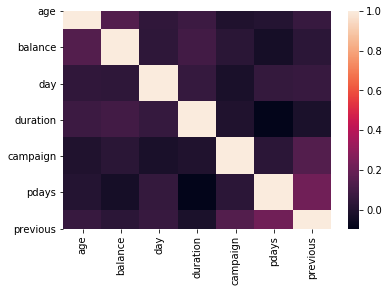

In [0]:
#correlation matrix
sns.heatmap(df.corr());

In [0]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

**cellular** is used as main contact device

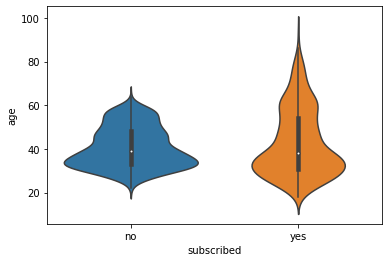

In [0]:
sns.violinplot(data=df, x='subscribed', y='age')
plt.show()

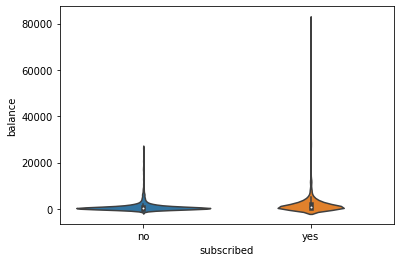

In [41]:
sns.violinplot(data=df, x='subscribed', y='balance')
plt.show()

We can see that **clients** **over 65 and under 20** are all **subscribed**

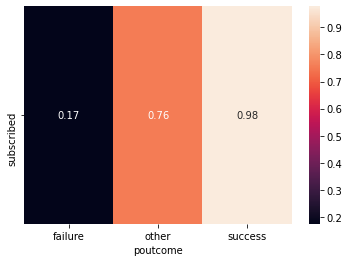

In [0]:
pivot_table_LCG = df.pivot_table(values='subscribed',  
                           columns='poutcome',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

If we look at outcome from previous campaign and for effect they have on subscription. We can see that if poucome was set to success, there is 98% chance that client will be subscribed. Where for poucome with status failure there is big chance that subscribed will be negative.

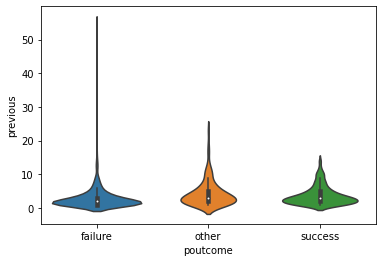

In [0]:
sns.violinplot(data=df, x='poutcome', y='previous')
plt.show()

plot above it shows that success was acchiwed when calls were not made more then 18 times.

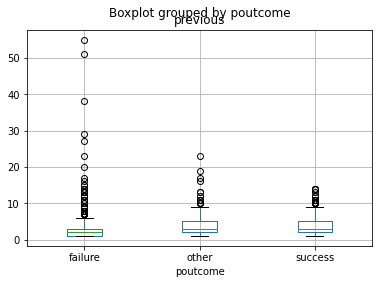

In [28]:
df.boxplot(column='previous', by='poutcome') 
plt.show()

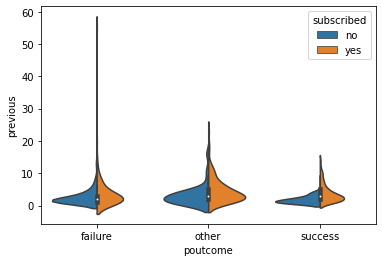

In [30]:
sns.violinplot(data=df, x='poutcome', y='previous', hue='subscribed', split=True)
plt.show()

violinplot shows that duration of the call affects subscription status- longer calls will get more subscriptions, and this would be the same for cellulars and for the telephones

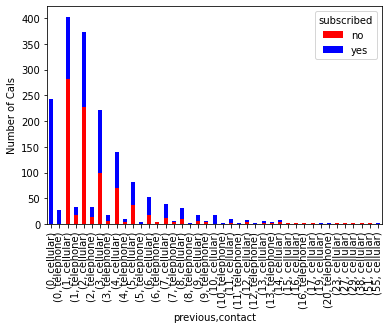

In [9]:
 

crosstab_CGL = pd.crosstab([df['previous'], df['contact']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Cals')
plt.show()

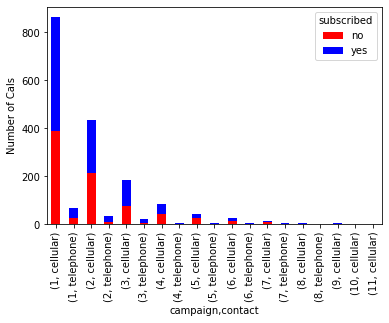

In [36]:
crosstab_CGL = pd.crosstab([df['campaign'], df['contact']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Cals')
plt.show()

Both crosstab abowe are showing that there is no difference if cellular or telephone was used.
In most casses subscription was set to yes after one call

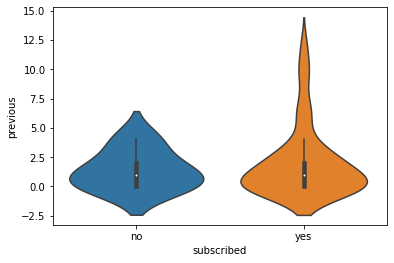

In [38]:
sns.violinplot(data=df.loc[df['age'] <= 25], x='subscribed', y='previous' )
plt.show() 